# Part I: Preprocessing

## Basic setting

In [81]:
import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

In [82]:
# Load data
df_sales2016 = pd.read_csv(
    "../data/preprocessed-data/2016_sales.csv", parse_dates=["date"]
)
df_sales2017 = pd.read_csv(
    "../data/preprocessed-data/2017_sales.csv", parse_dates=["date"]
)

In [83]:
df_sales2016.head()

,date,store,item,sales
0,2016-01-01,1,1,21
1,2016-01-02,1,1,13
2,2016-01-03,1,1,12
3,2016-01-04,1,1,12
4,2016-01-05,1,1,12


In [84]:
def add_outliers_and_nans(data, outlier_percentage=0.1, nan_percentage=0.1):
    # Copy the original data to avoid modifying the input directly
    modified_data = data.copy()

    # Calculate the number of rows to add outliers and NaN values
    num_rows = len(modified_data)
    num_outliers = int(num_rows * outlier_percentage / 100)
    num_nans = int(num_rows * nan_percentage / 100)

    # Add outliers to the 'sales' column
    np.random.seed(42)  # Setting seed for reproducibility
    outlier_indices = np.random.choice(num_rows, num_outliers, replace=False)
    modified_data.loc[
        outlier_indices, "sales"
    ] *= 5  # Increase sales by a factor to create outliers

    # Add NaN values to the 'sales' column
    nan_indices = np.random.choice(num_rows, num_nans, replace=False)
    modified_data.loc[nan_indices, "sales"] = np.nan

    return modified_data

In [85]:
df_sales2016_modified = add_outliers_and_nans(
    df_sales2016, outlier_percentage=0.5, nan_percentage=1
)
df_sales2017_modified = add_outliers_and_nans(
    df_sales2017, outlier_percentage=0.75, nan_percentage=0.75
)

In [89]:
# Save data
df_sales2016_modified.to_csv("../data/preprocessed-data/2016_sales.csv", index=False)
df_sales2017_modified.to_csv("../data/preprocessed-data/2017_sales.csv", index=False)

In [86]:
df_sales2016_modified.isna().sum()

date        0
store       0
item        0
sales    1830
dtype: int64

In [87]:
df_sales2017_modified.isna().sum()

date        0
store       0
item        0
sales    1368
dtype: int64

In [23]:
# import matplotlib.pyplot as plt

# store_id = 1
# item_id = 10
# df_sample = df_sales2016_modified.query("(store==@store_id) & (item==@item_id)")

# fig, ax = plt.subplots()

# # Plot sales data
# df_sample[["date", "sales"]].plot(x="date", y="sales", ax=ax, legend=False)

# # Draw lines for NaN values
# nan_indices = df_sample[df_sample["sales"].isna()].index
# if len(nan_indices) > 1:
#     nan_dates = df_sample.loc[nan_indices, "date"]
#     df_sample.loc[nan_indices, "sales"] = 20
#     nan_sales = df_sample.loc[nan_indices, "sales"]

#     # Plot lines connecting points near NaN values
#     ax.plot(
#         nan_dates, nan_sales, color="red", marker="o", linestyle="-", label="NaN values"
#     )

# # Set plot labels and legend
# ax.set_xlabel("Date")
# ax.set_ylabel("Sales")
# ax.set_title(f"Store {store_id}, Item {item_id} Sales with Lines for NaN Values")
# ax.legend()

# plt.show()

In [24]:
# import matplotlib.pyplot as plt

# store_id = 1
# item_id = 10
# df_sample = df_sales2016_modified.query("(store==@store_id) & (item==@item_id)")

# fig, ax = plt.subplots()

# # Plot sales data
# df_sample[["date", "sales"]].plot(x="date", y="sales", ax=ax, legend=False)

# # Replace NaN values with the mean of surrounding two points
# nan_indices = df_sample[df_sample["sales"].isna()].index
# if len(nan_indices) > 1:
#     df_sample = df_sample.assign(sales=lambda df: df["sales"].fillna(method="ffill"))
#     # Draw arrows for NaN values
#     nan_dates = df_sample.loc[nan_indices, "date"]
#     nan_sales = df_sample.loc[nan_indices, "sales"]
#     for date, sales in zip(nan_dates, nan_sales):
#         ax.annotate(
#             "-",
#             xy=(date, sales),
#             # xytext=(date, sales),  # Adjust the arrow tail position
#             color="red",  # Set text color to red
#             # arrowprops=dict(facecolor="red", arrowstyle="<-", linestyle="-", edgecolor="red"),
#         )

# # Set plot labels and legend
# ax.set_xlabel("Date")
# ax.set_ylabel("Sales")
# ax.set_title(f"Store {store_id}, Item {item_id}")
# ax.legend()

# plt.show()


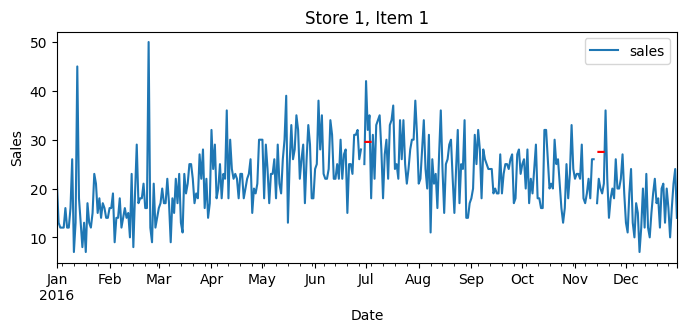

In [26]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set global font weight to bold
# rcParams['font.weight'] = 'bold'

store_id = 1
item_id = 1
df_sample = df_sales2016_modified.query("(store==@store_id) & (item==@item_id)")

fig, ax = plt.subplots(figsize=(8,3))

# Plot sales data
df_sample[["date", "sales"]].plot(x="date", y="sales", ax=ax, legend=False)

# Replace NaN values with the mean of surrounding two points
nan_indices = df_sample[df_sample["sales"].isna()].index

if len(nan_indices) > 1:
    df_sample = df_sample.assign(sales=lambda df: df["sales"].fillna(method="ffill"))
    # Draw arrows for NaN values
    nan_dates = df_sample.loc[nan_indices, "date"]
    nan_sales = df_sample.loc[nan_indices, "sales"]
    for date, sales in zip(nan_dates, nan_sales):
        ax.annotate(
            "-",
            xy=(date, sales),
            color="red",  # Set text color to red
            size=20,
        )

# Set plot labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Sales")
ax.set_title(f"Store {store_id}, Item {item_id}")
ax.legend()

plt.show()


## Fill Nan Values and Correct Outliers

In [27]:
import pandas as pd
import numpy as np

def fill_nan_values(data):
    # Fill NaN values in the 'sales' column with the mean of non-NaN values
    data_filled = data.copy()
    data_filled['sales'] = data_filled['sales'].fillna(data_filled['sales'].mean())
    return data_filled

def correct_outliers(data, factor=5):
    # Identify and correct outliers in the 'sales' column by reducing them to the mean
    data_corrected = data.copy()
    
    # Identify outliers using z-score
    z_scores = (data_corrected['sales'] - data_corrected['sales'].mean()) / data_corrected['sales'].std()
    outlier_indices = np.abs(z_scores) > 3  # Adjust the threshold as needed
    
    # Correct outliers by reducing them to the mean
    data_corrected.loc[outlier_indices, 'sales'] = data_corrected['sales'].mean()
    
    return data_corrected

In [76]:
# Example usage:
# Generate sample data with outliers and NaNs
data = pd.DataFrame({
    'date': pd.date_range('2022-01-01', periods=15),
    'sales': np.random.randint(1,5)
})

# Add outliers and NaN values using the provided function
modified_data = add_outliers_and_nans(data, outlier_percentage=20, nan_percentage=20)
modified_data.loc[8, "sales"] = 100
# Fill NaN values
filled_data = fill_nan_values(modified_data)

# Correct outliers
corrected_data = correct_outliers(filled_data)

In [77]:
modified_data

,date,sales
0,2022-01-01,NaN
1,2022-01-02,1.0
2,2022-01-03,1.0
3,2022-01-04,1.0
4,2022-01-05,1.0
5,2022-01-06,1.0
6,2022-01-07,1.0
7,2022-01-08,1.0
8,2022-01-09,100.0
9,2022-01-10,5.0


In [78]:
filled_data

,date,sales
0,2022-01-01,9.916667
1,2022-01-02,1.000000
2,2022-01-03,1.000000
3,2022-01-04,1.000000
4,2022-01-05,1.000000
5,2022-01-06,1.000000
6,2022-01-07,1.000000
7,2022-01-08,1.000000
8,2022-01-09,100.000000
9,2022-01-10,5.000000


In [79]:
correct_outliers(filled_data)

,date,sales
0,2022-01-01,9.916667
1,2022-01-02,1.000000
2,2022-01-03,1.000000
3,2022-01-04,1.000000
4,2022-01-05,1.000000
5,2022-01-06,1.000000
6,2022-01-07,1.000000
7,2022-01-08,1.000000
8,2022-01-09,9.916667
9,2022-01-10,5.000000
